<a href="https://colab.research.google.com/github/sollall/myidea/blob/master/%E7%B5%84%E6%88%90%E5%BC%8F%E3%81%8B%E3%82%89%E6%A7%8B%E9%80%A0%E6%8F%90%E6%A1%88%E3%81%97%E3%81%A6%E3%81%BB%E3%81%97%E3%81%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!pip install condacolab
import condacolab
condacolab.install()

!mamba install -c conda-forge rdkit

from google.colab import output
output.clear()

In [43]:
from rdkit import Chem
from rdkit.Chem import Draw
import copy

In [44]:
node=["C","O","C","C","Cl"]
atom_edge={"C":4,"O":2,"Cl":1}
have_edges=[atom_edge[node[i]] for i in range(len(node))]

mols=[]

def saiki(num,node,have_edge,ans=[[0 for i in range(len(node))] for j in range(len(node))],visited=[0]*len(node)):
    visited[num]=1
    #if すべてが訪れたら
    for i in range(len(node)):
        if num==i:
            continue #自分とは接続しない
        if ans[num][i]!=0:
            continue #一度結合数を決めたら変えない
        
        for num_connect in range(1,min(have_edge[num],have_edge[i])+1):
            #ここ改善できそう
            have_edge[num]-=num_connect
            have_edge[i]-=num_connect
            ans[num][i]+=num_connect
            ans[i][num]+=num_connect
            saiki(i,node,have_edge,ans)
            have_edge[num]+=num_connect
            have_edge[i]+=num_connect
            ans[num][i]-=num_connect
            ans[i][num]-=num_connect

    judge=[True if have_edge[i]!=have_edges[i] else False for i in range(len(have_edges))]
    if sum(visited)==len(node):
        temp=copy.deepcopy(ans)
        mols.append(temp)
        print(temp)
    return


saiki(0,node,have_edges)

#https://cloud6.net/so/python/875586を改造
def MolFromGraphs(node_list, adjacency_matrix):

    # create empty editable mol object
    mol = Chem.RWMol()

    # add atoms to mol and keep track of index
    node_to_idx = {}
    for i in range(len(node_list)):
        a = Chem.Atom(node_list[i])
        molIdx = mol.AddAtom(a)
        node_to_idx[i] = molIdx

    # add bonds between adjacent atoms
    for ix, row in enumerate(adjacency_matrix):
        for iy, bond in enumerate(row):

            # only traverse half the matrix
            if iy <= ix:
                continue

            # add relevant bond type (there are many more of these)
            if bond == 0:
                continue
            elif bond == 1:
                bond_type = Chem.rdchem.BondType.SINGLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
            elif bond == 2:
                bond_type = Chem.rdchem.BondType.DOUBLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)
            elif bond == 3:
                bond_type = Chem.rdchem.BondType.TRIPLE
                mol.AddBond(node_to_idx[ix], node_to_idx[iy], bond_type)

    # Convert RWMol to Mol object
    mol = mol.GetMol()            

    return mol
    

[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 1], [1, 0, 1, 0, 0], [0, 0, 1, 0, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 2, 0], [1, 0, 2, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [1, 0, 0, 0, 1], [0, 0, 0, 1, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 1], [2, 0, 1, 0, 0], [0, 0, 1, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 0], [2, 0, 1, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 2, 0], [2, 0, 2, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [2, 0, 0, 0, 1], [0, 0, 0, 1, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [2, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 0, 1], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]]
[[0, 1, 1, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0

[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 1], [1, 0, 1, 0, 0], [0, 0, 1, 0, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 0], [1, 0, 1, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 2, 0], [1, 0, 2, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [1, 0, 0, 0, 1], [0, 0, 0, 1, 0]]
[[0, 1, 1, 1, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 1], [2, 0, 1, 0, 0], [0, 0, 1, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 1, 0], [2, 0, 1, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 2, 0], [2, 0, 2, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [2, 0, 0, 0, 1], [0, 0, 0, 1, 0]]
[[0, 1, 1, 2, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [2, 0, 0, 0, 0], [0, 0, 0, 0, 0]]
[[0, 1, 1, 0, 1], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 0, 0], [1, 0, 0, 0, 0]]
[[0, 1, 1, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0

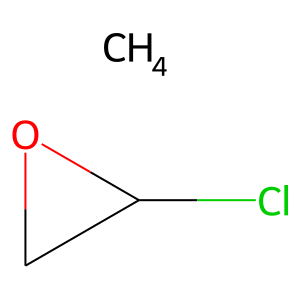

In [47]:
for mol in mols:
    print(mol)
get=MolFromGraphs(node,mols[10])
Draw.MolToImage(get)